# Step 1: Data Collection - Load and inspect the dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
df = pd.read_csv(r"E:\Unified Mentor\IBMHRAnalyticsEmployeeAttrition&Performance\WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("First 10 rows of the DataFrame:")
df.head(10)

First 10 rows of the DataFrame:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [11]:
# Initial inspection
print("Dataset shape:", df.shape)
print("\nData types and missing values:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset shape: (1470, 35)

Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement      

# 2. Data Preprocessing

In [17]:
# Drop columns with single unique value or irrelevant for analysis
cols_to_drop = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(cols_to_drop, axis=1)

# Convert categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_cols)

# Label encode target variable
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [21]:
# DataFrame after Data Preprocessing

print("First 10 rows of the DataFrame after Data Preprocessing:")
df.head(10)

First 10 rows of the DataFrame after Data Preprocessing:


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,...,3,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,...,4,1,3,12,3,2,1,0,0,0
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,4,Male,...,4,2,1,1,2,3,1,0,0,0
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,4,Male,...,4,2,0,10,2,3,9,7,1,8
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,3,Male,...,3,2,2,17,3,2,7,7,7,7


# 3. Exploratory Data Analysis (EDA)

In [24]:
# Summary statistics
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


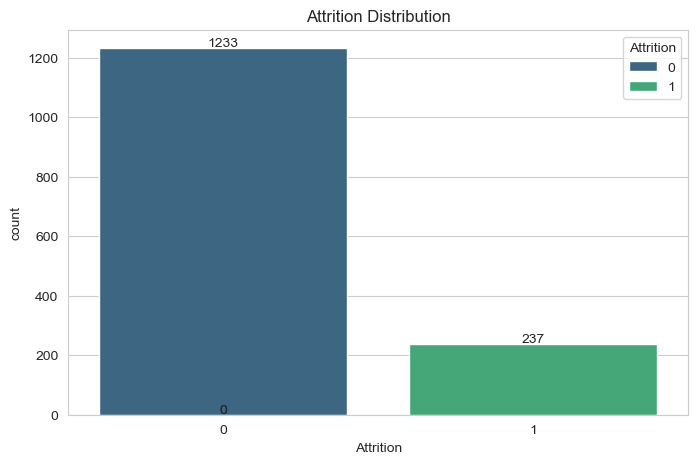

In [30]:
# Attrition distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='Attrition', data=df, hue = 'Attrition', palette="viridis")

# Add labels on top of bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height() + 5,             
            int(p.get_height()),            
            ha='center')
    
plt.title('Attrition Distribution')
plt.show()

In [32]:
# Attrition rate
attrition_rate = df['Attrition'].mean()
print(f"\nAttrition Rate: {attrition_rate:.2%}")


Attrition Rate: 16.12%


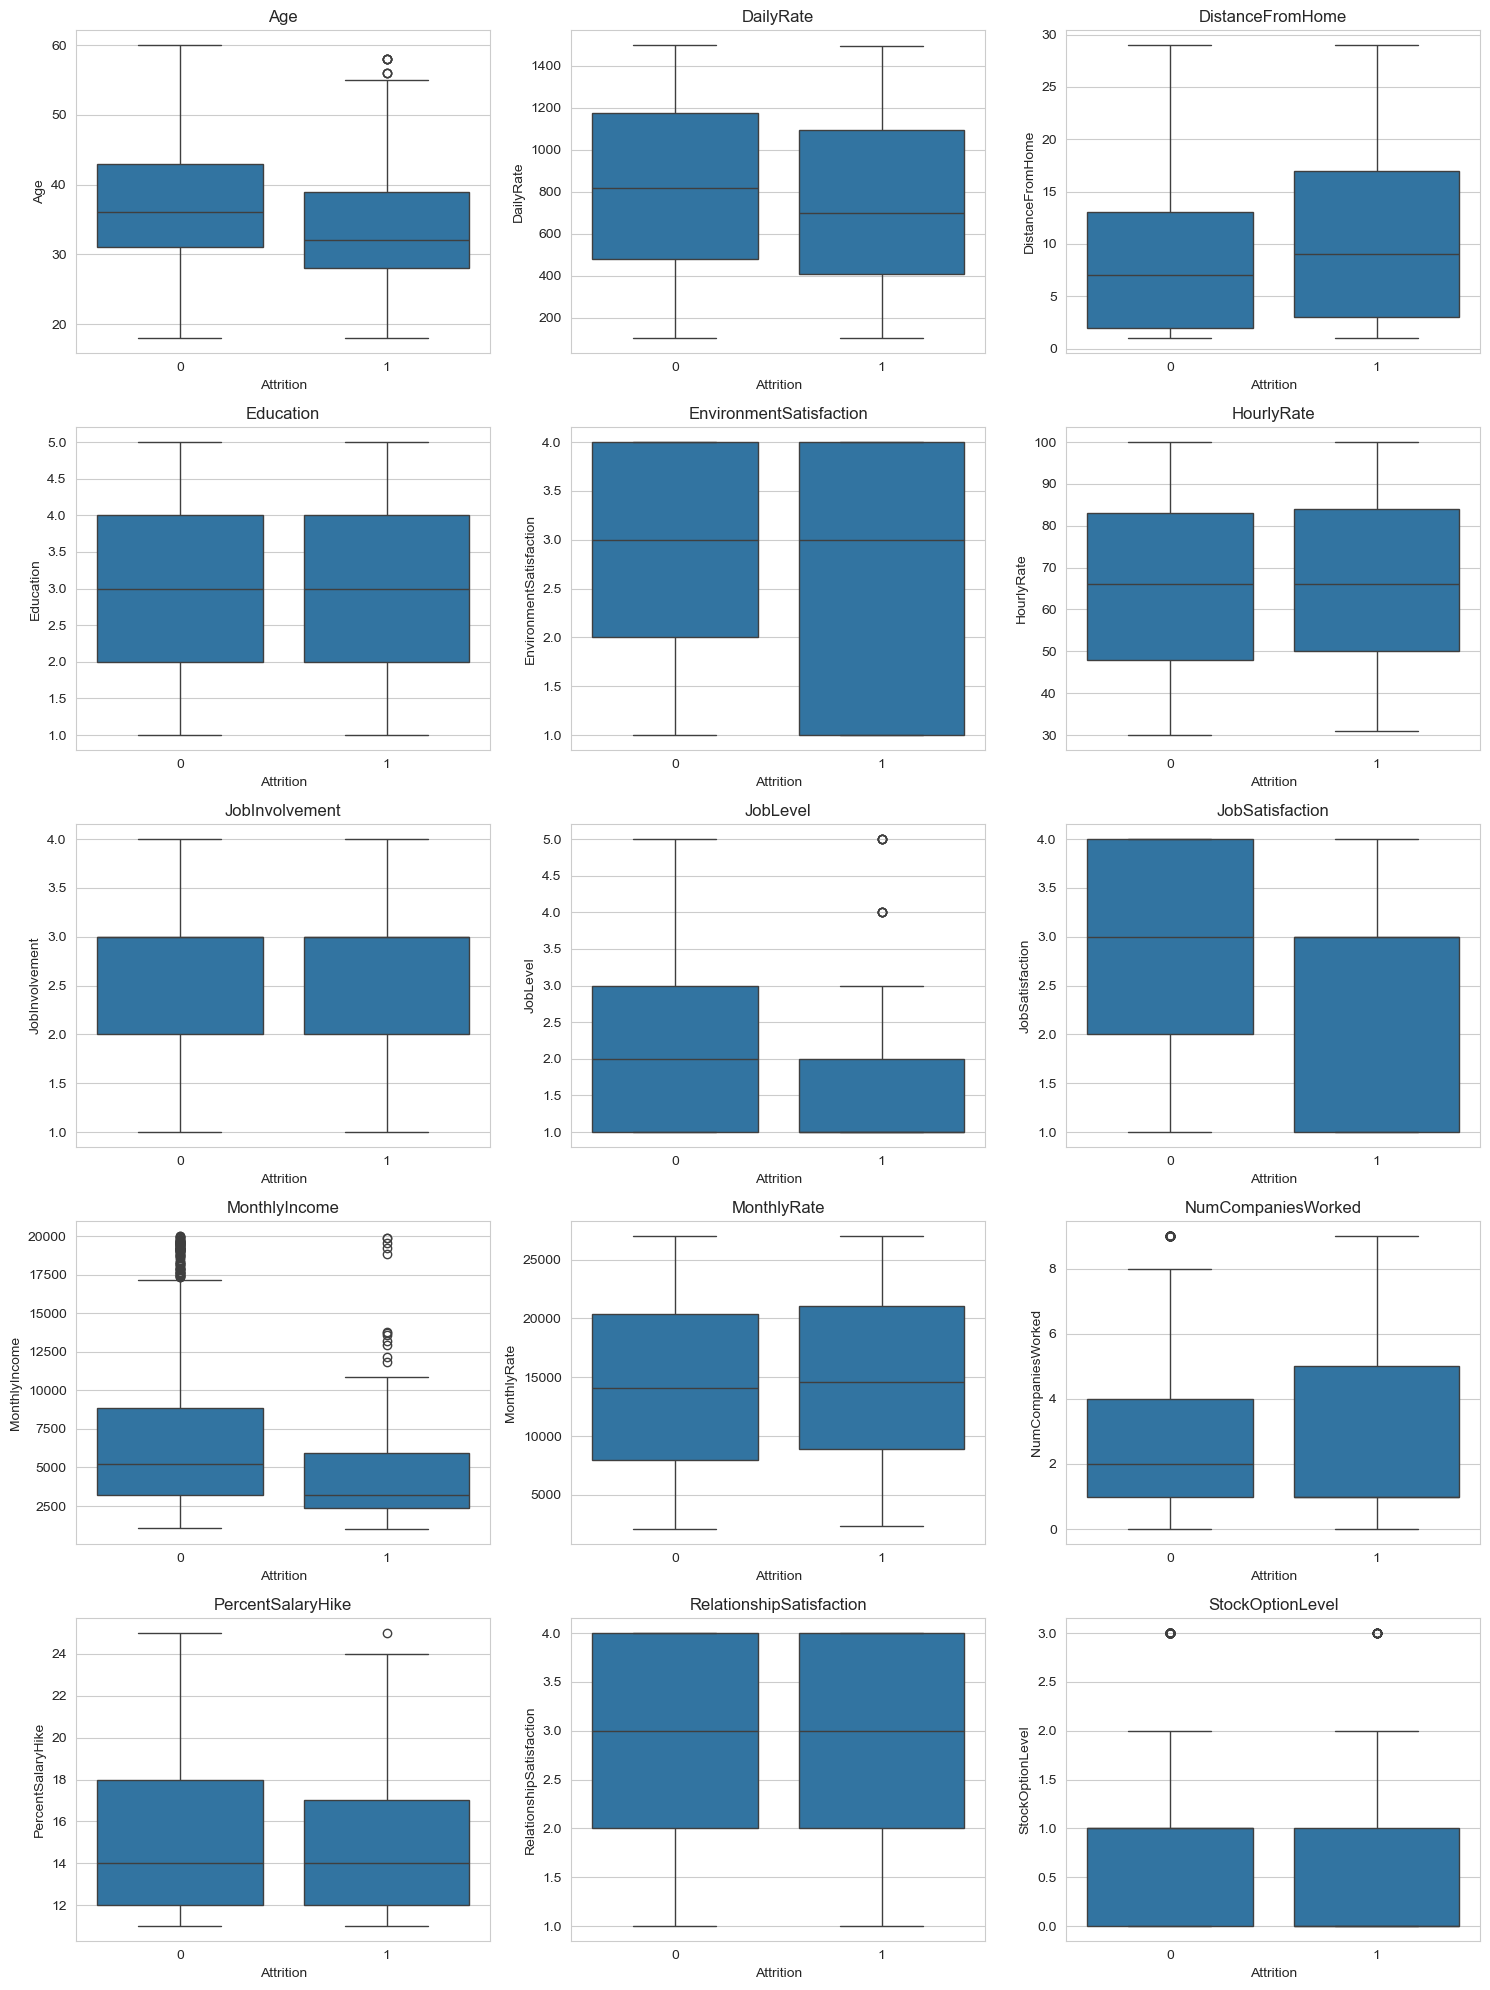

In [56]:
# Numerical features distribution by Attrition
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove 'Attrition' and 'PerformanceRating' from the list
num_cols.remove('Attrition')
if 'PerformanceRating' in num_cols:
    num_cols.remove('PerformanceRating')

plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols[:15]):  # Plot first 15 for brevity
    plt.subplot(5, 3, i+1)
    sns.boxplot(x='Attrition', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

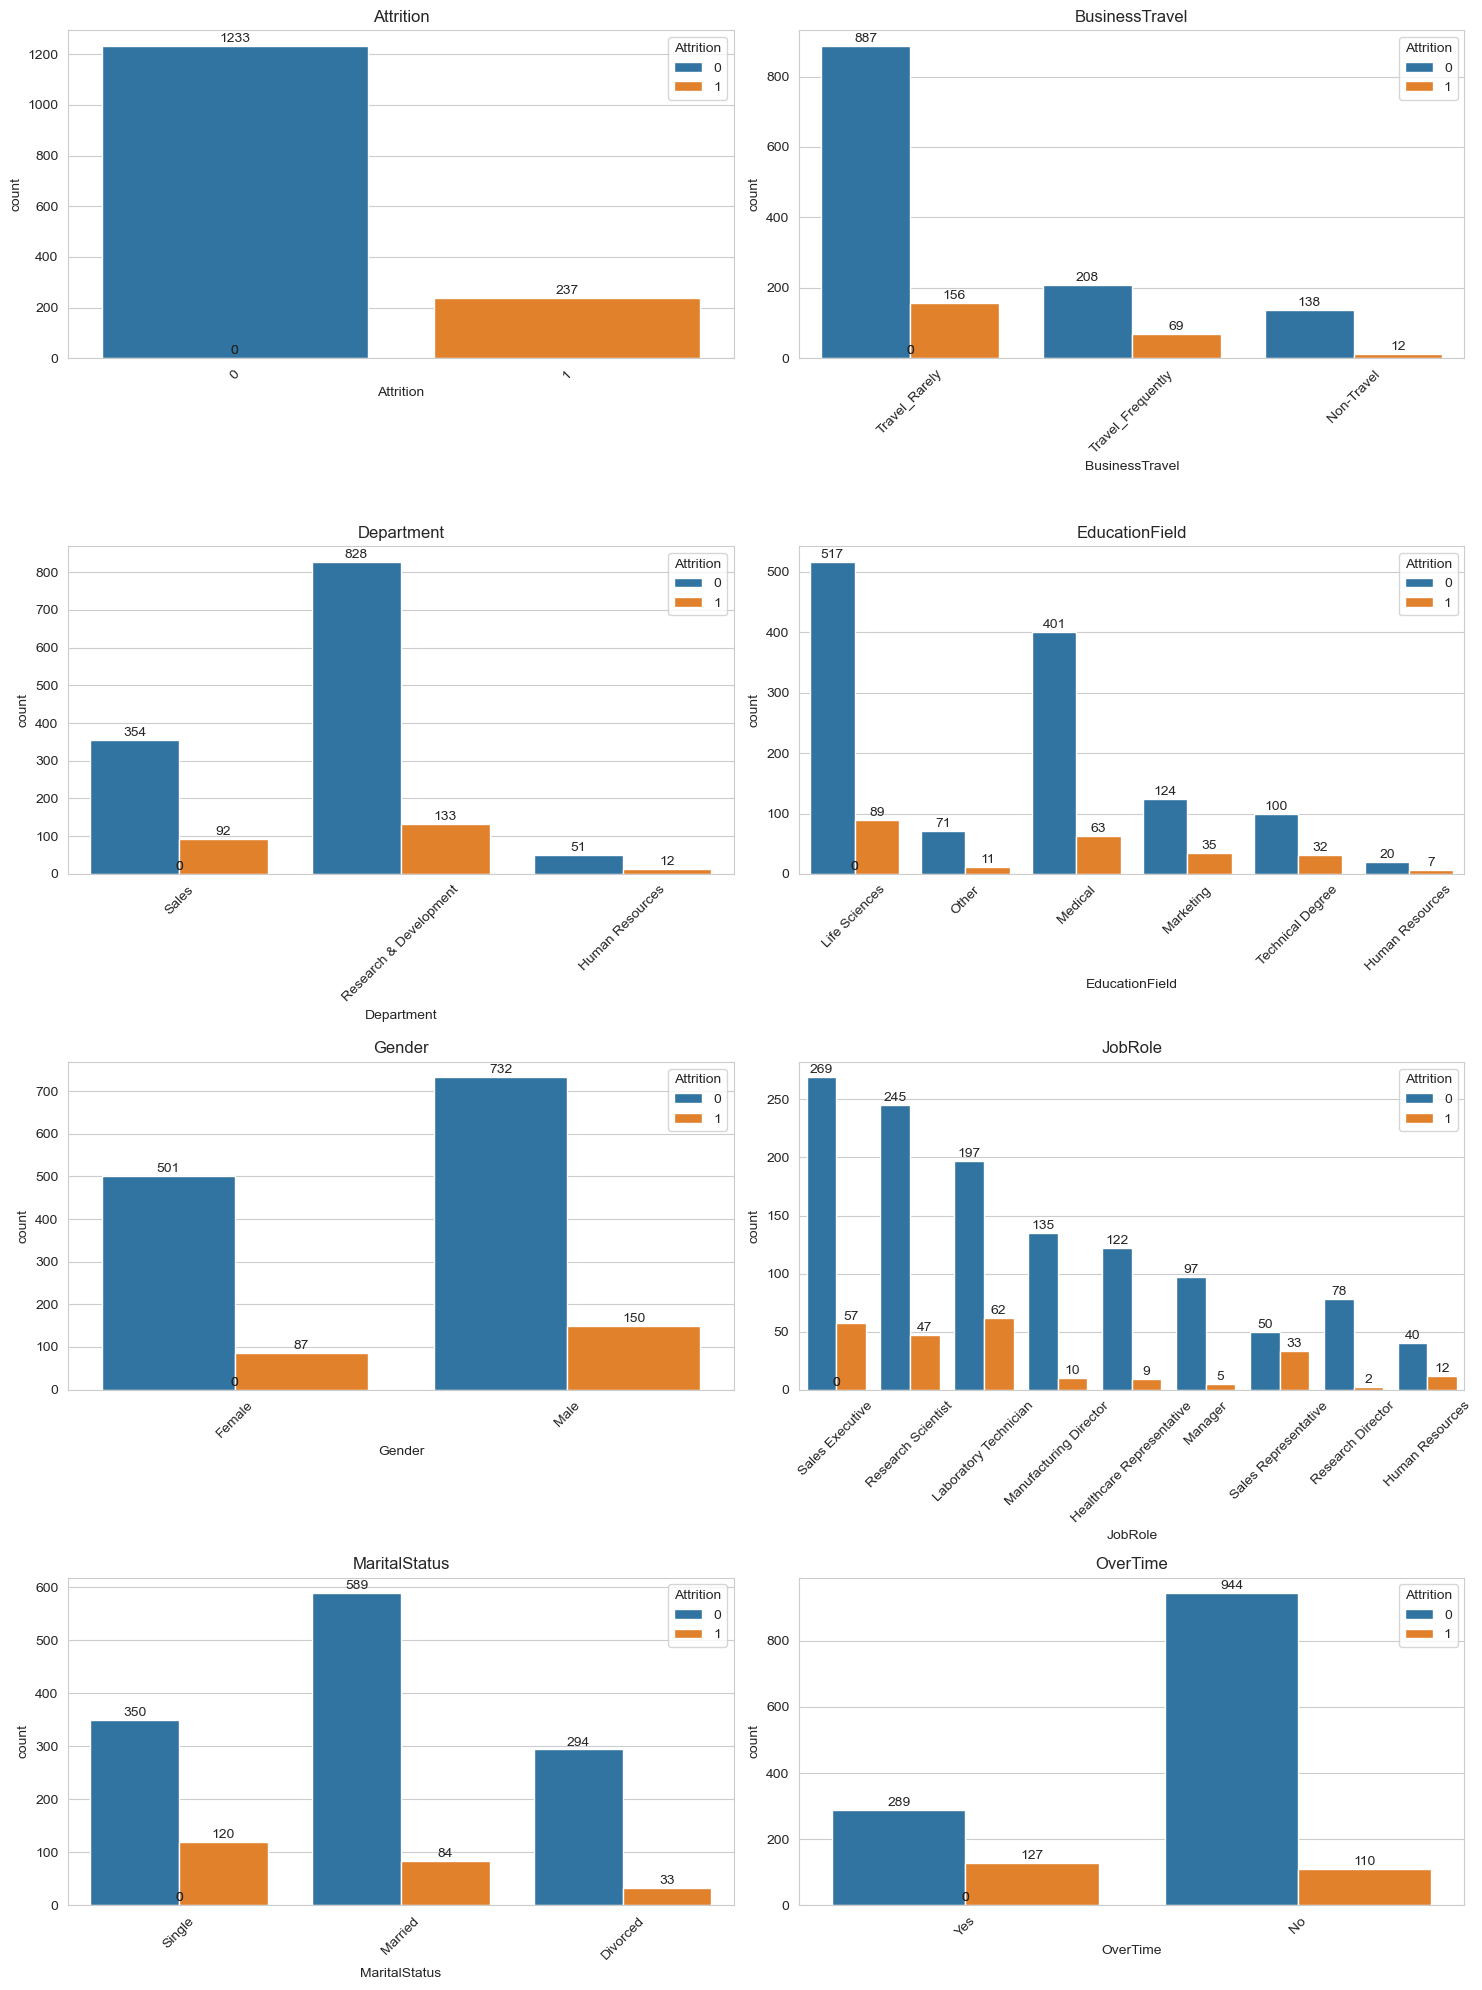

In [74]:
# Categorical features distribution by Attrition
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i + 1)
    ax = sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(col)
    plt.xticks(rotation=45)

# Add labels to each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 5), 
                    textcoords='offset points')
        
plt.tight_layout()
plt.show()

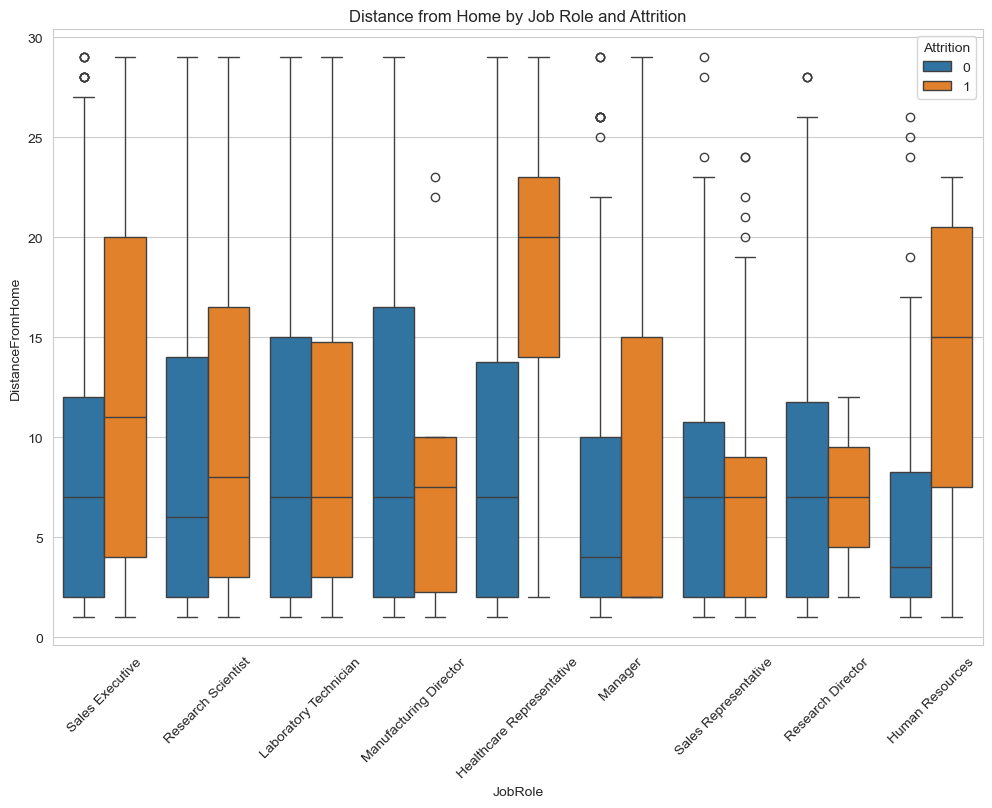

In [76]:
# Specific requested analyses
# Breakdown of distance from home by job role and attrition
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobRole', y='DistanceFromHome', hue='Attrition', data=df)
plt.title('Distance from Home by Job Role and Attrition')
plt.xticks(rotation=45)
plt.show()

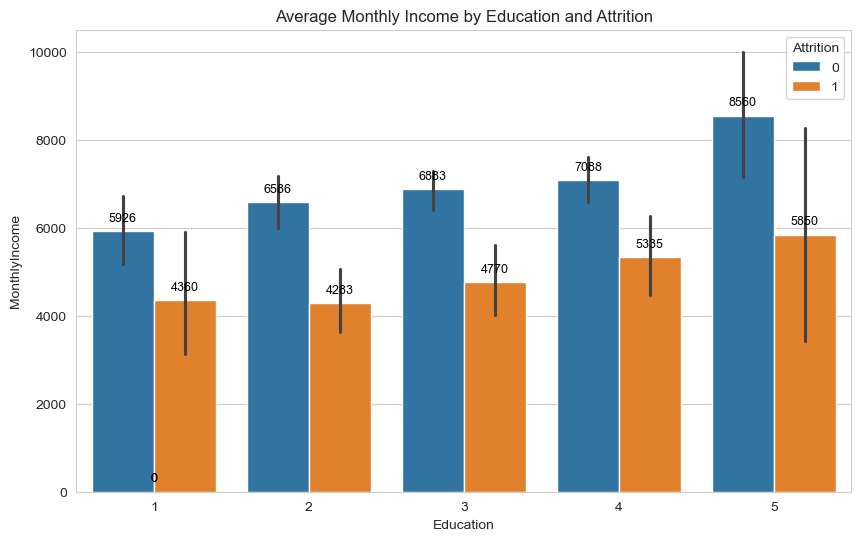

In [80]:
# Compare average monthly income by education and attrition
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=df)

# Add labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}',  # rounded to 0 decimal places
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom',
                fontsize=9, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Average Monthly Income by Education and Attrition')
plt.show()

# 4. Feature Engineering

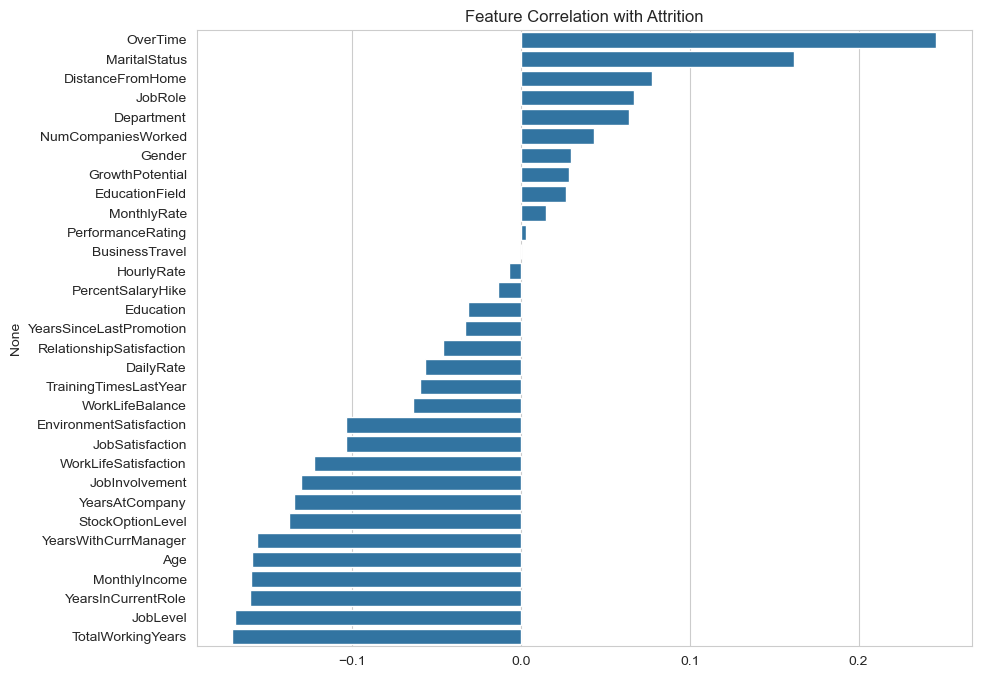

In [87]:
# Create new features
# Work-life balance score (combining WorkLifeBalance and JobSatisfaction)
df['WorkLifeSatisfaction'] = df['WorkLifeBalance'] + df['JobSatisfaction']

# Career growth potential (YearsAtCompany vs YearsSinceLastPromotion)
df['GrowthPotential'] = df['YearsSinceLastPromotion'] / (df['YearsAtCompany'] + 0.1)  # Add small constant to avoid division by zero

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Create correlation matrix
corr_matrix = df.corr()

# Plot correlation with Attrition
plt.figure(figsize=(10, 8))
attrition_corr = corr_matrix['Attrition'].sort_values(ascending=False)
sns.barplot(x=attrition_corr.values[1:], y=attrition_corr.index[1:])
plt.title('Feature Correlation with Attrition')
plt.show()

# 5. Modeling Preparation

In [90]:
# Split data into features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# 6. Model Building


Model Evaluation:
Accuracy: 86.85%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       380
           1       0.64      0.11      0.19        61

    accuracy                           0.87       441
   macro avg       0.76      0.55      0.56       441
weighted avg       0.84      0.87      0.83       441



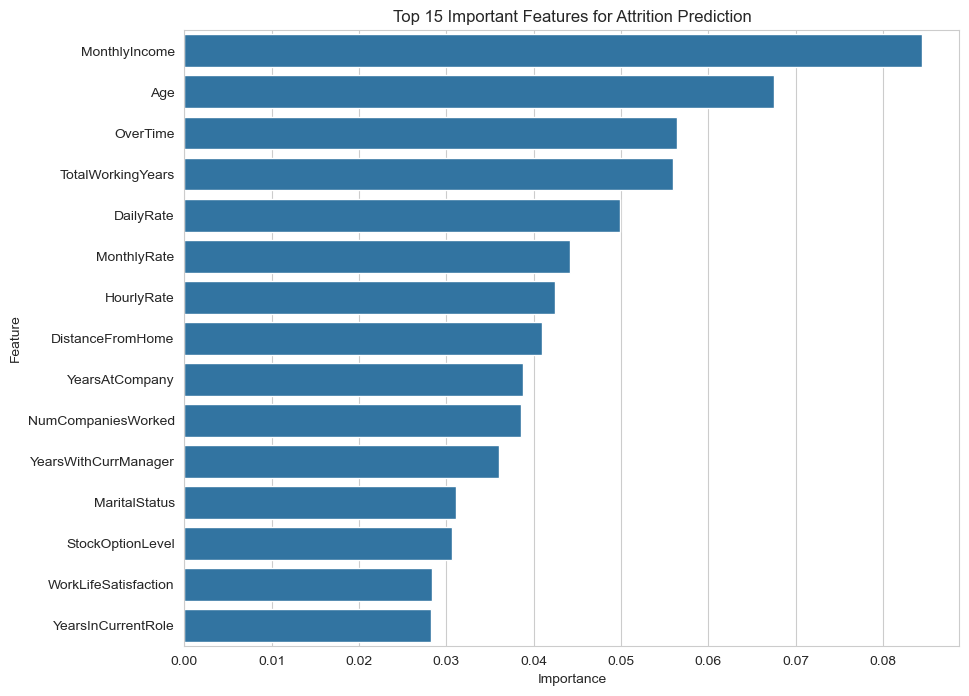

In [93]:
# Train Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features for Attrition Prediction')
plt.show()

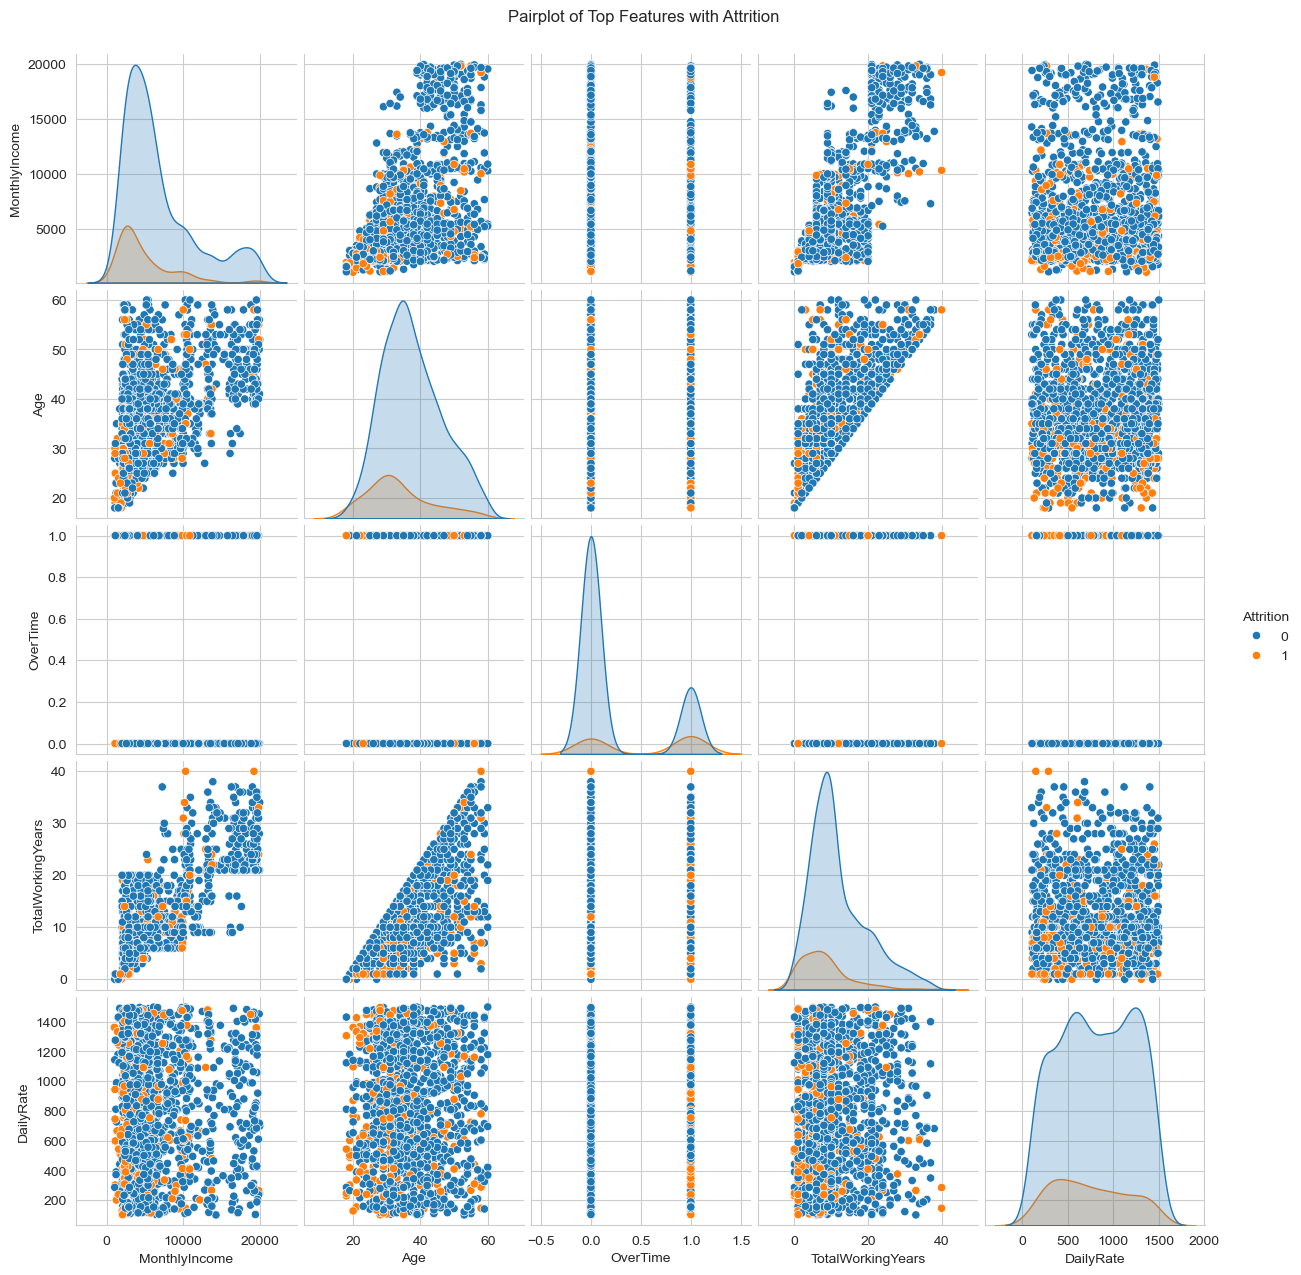

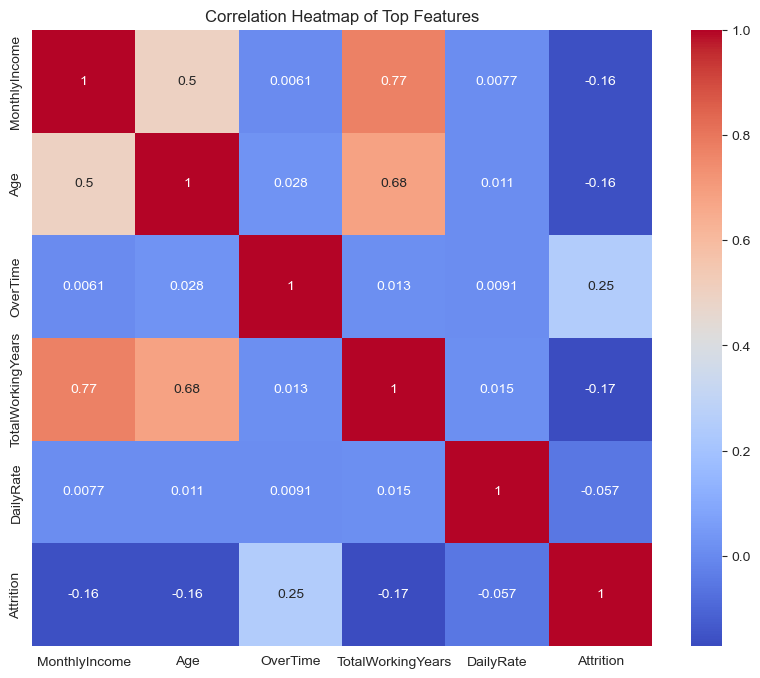

In [96]:
# Pairplot of top correlated features with Attrition
top_features = feature_importance['Feature'].head(5).tolist()
sns.pairplot(df[top_features + ['Attrition']], hue='Attrition')
plt.suptitle('Pairplot of Top Features with Attrition', y=1.02)
plt.show()

# Heatmap of top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_features + ['Attrition']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Top Features')
plt.show()